In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avishs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'

In [3]:
# set palette color
plt.style.use(PLOT_PALETTE)
%matplotlib inline

In [4]:
df = pd.read_csv('Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
# drop unused columns
df.pop('ID')
df.pop('Resume_html')

0       <div class="fontsize fontface vmargins hmargin...
1       <div class="fontsize fontface vmargins hmargin...
2       <div class="fontsize fontface vmargins hmargin...
3       <div class="fontsize fontface vmargins hmargin...
4       <div class="fontsize fontface vmargins hmargin...
                              ...                        
2479    <div class="fontsize fontface vmargins hmargin...
2480    <div class="fontsize fontface vmargins hmargin...
2481    <div class="fontsize fontface vmargins hmargin...
2482    <div class="fontsize fontface vmargins hmargin...
2483    <div class="fontsize fontface vmargins hmargin...
Name: Resume_html, Length: 2484, dtype: object

In [6]:
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [7]:
classes = set(df.Category)
print(classes)

{'AUTOMOBILE', 'ENGINEERING', 'DESIGNER', 'APPAREL', 'INFORMATION-TECHNOLOGY', 'AVIATION', 'HEALTHCARE', 'CHEF', 'SALES', 'ACCOUNTANT', 'ADVOCATE', 'HR', 'AGRICULTURE', 'FINANCE', 'BUSINESS-DEVELOPMENT', 'FITNESS', 'CONSULTANT', 'DIGITAL-MEDIA', 'BANKING', 'PUBLIC-RELATIONS', 'CONSTRUCTION', 'ARTS', 'TEACHER', 'BPO'}


In [8]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [9]:
class_to_index

{'AUTOMOBILE': 0,
 'ENGINEERING': 1,
 'DESIGNER': 2,
 'APPAREL': 3,
 'INFORMATION-TECHNOLOGY': 4,
 'AVIATION': 5,
 'HEALTHCARE': 6,
 'CHEF': 7,
 'SALES': 8,
 'ACCOUNTANT': 9,
 'ADVOCATE': 10,
 'HR': 11,
 'AGRICULTURE': 12,
 'FINANCE': 13,
 'BUSINESS-DEVELOPMENT': 14,
 'FITNESS': 15,
 'CONSULTANT': 16,
 'DIGITAL-MEDIA': 17,
 'BANKING': 18,
 'PUBLIC-RELATIONS': 19,
 'CONSTRUCTION': 20,
 'ARTS': 21,
 'TEACHER': 22,
 'BPO': 23}

In [10]:
index_to_class

{0: 'AUTOMOBILE',
 1: 'ENGINEERING',
 2: 'DESIGNER',
 3: 'APPAREL',
 4: 'INFORMATION-TECHNOLOGY',
 5: 'AVIATION',
 6: 'HEALTHCARE',
 7: 'CHEF',
 8: 'SALES',
 9: 'ACCOUNTANT',
 10: 'ADVOCATE',
 11: 'HR',
 12: 'AGRICULTURE',
 13: 'FINANCE',
 14: 'BUSINESS-DEVELOPMENT',
 15: 'FITNESS',
 16: 'CONSULTANT',
 17: 'DIGITAL-MEDIA',
 18: 'BANKING',
 19: 'PUBLIC-RELATIONS',
 20: 'CONSTRUCTION',
 21: 'ARTS',
 22: 'TEACHER',
 23: 'BPO'}

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
tokenizer = Tokenizer(num_words=30000, oov_token='<UNK')
tokenizer.fit_on_texts(df.Resume_str)

In [13]:
tokenizer.texts_to_sequences([df.Resume_str[0]])

[[201,
  803,
  35,
  233,
  201,
  803,
  118,
  910,
  20,
  25,
  33,
  8,
  731,
  126,
  4,
  29,
  6,
  1723,
  2,
  20,
  25,
  13,
  4580,
  2880,
  2,
  430,
  4,
  20,
  597,
  305,
  8861,
  3,
  11323,
  9,
  1924,
  1602,
  2121,
  3,
  20,
  25,
  285,
  597,
  15,
  20,
  337,
  26,
  13,
  35,
  2298,
  1045,
  487,
  439,
  28,
  2,
  27,
  671,
  346,
  2299,
  60,
  124,
  247,
  265,
  3614,
  3961,
  379,
  28,
  524,
  257,
  23,
  12325,
  6,
  20,
  1880,
  2,
  35,
  23,
  3790,
  6151,
  2725,
  143,
  33,
  28,
  524,
  1498,
  969,
  7,
  500,
  317,
  1723,
  49,
  134,
  16,
  6151,
  15670,
  13730,
  8862,
  6463,
  25156,
  8862,
  4886,
  48,
  15671,
  25157,
  298,
  903,
  2,
  1373,
  6,
  20,
  25,
  18,
  221,
  97,
  120,
  996,
  1442,
  119,
  81,
  13,
  90,
  2,
  85,
  780,
  29,
  201,
  803,
  35,
  233,
  201,
  803,
  1398,
  79,
  3,
  73,
  12,
  14,
  22,
  11,
  10,
  4731,
  3,
  168,
  128,
  4805,
  2,
  2592,
  108,
  134,
  16,

In [14]:
df.Resume_str[0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

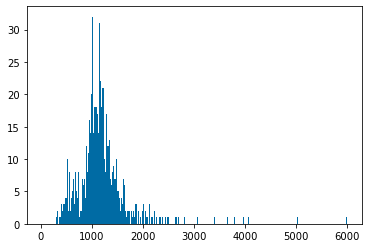

In [15]:
lengths = [len(t.split(' ')) for t in df.Resume_str]
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [16]:
#any resume more than 2000 words will be chopped
maxlen=2000

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
#all example will have same input size
def get_sequences(tokenizer,resume):
  sequences = tokenizer.texts_to_sequences(resume)
  padded = pad_sequences(sequences, truncating='post',padding='post',maxlen=maxlen)
  return padded

In [19]:
padded_train_seq = get_sequences(tokenizer, df.Resume_str)

In [20]:
padded_train_seq[0]

array([201, 803,  35, ...,   0,   0,   0])

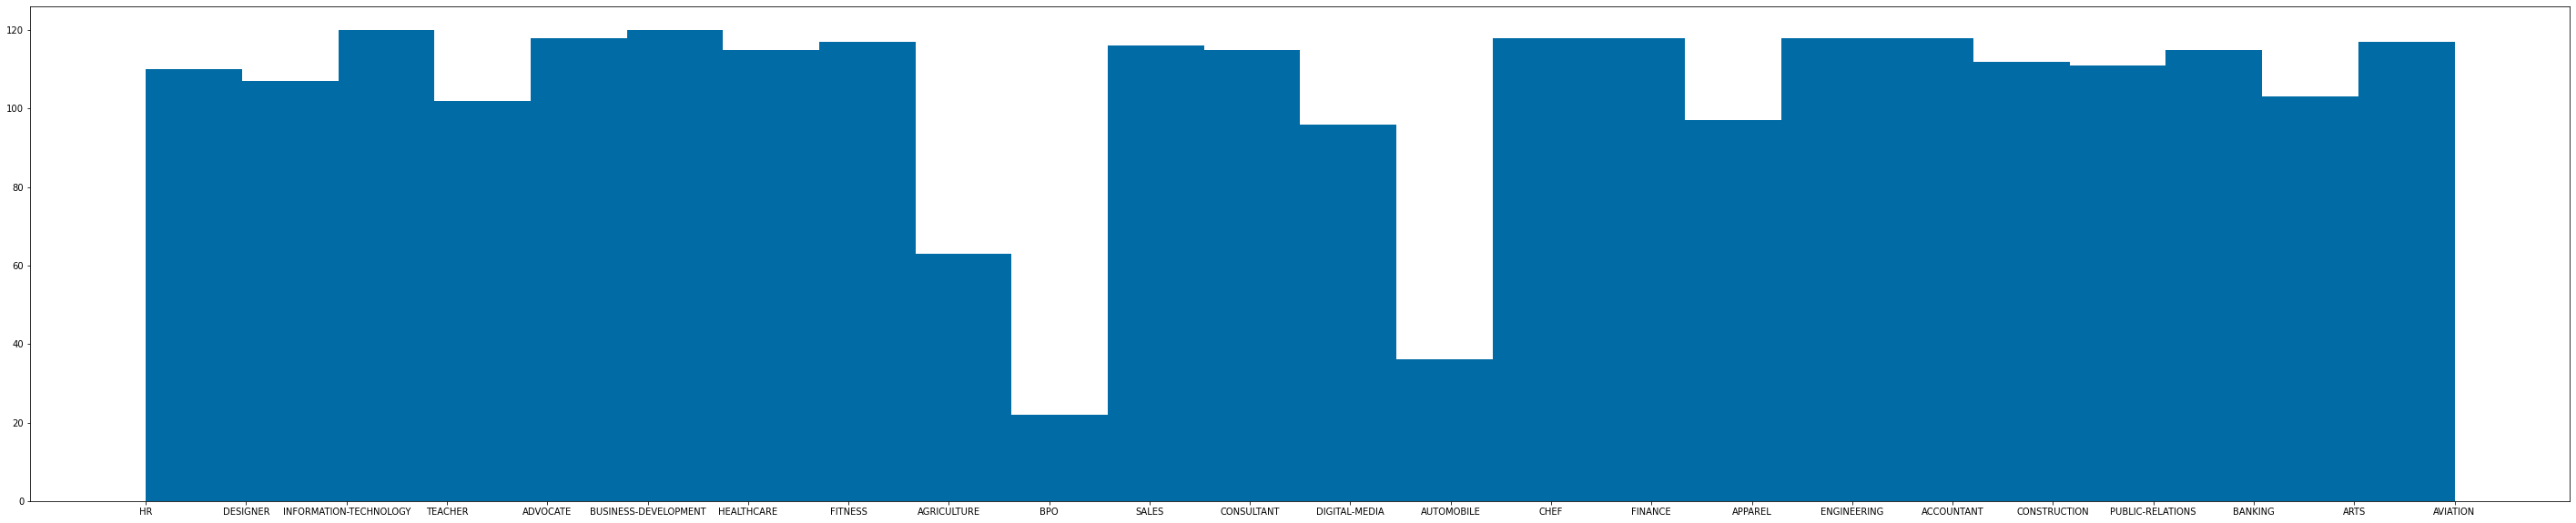

In [21]:
plt.figure(figsize=(50, 10))
plt.hist(df.Category,bins=24)
plt.show()

In [22]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [23]:
train_labels = names_to_ids(df.Category)
print(train_labels[0])

11


In [45]:
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [46]:
#I'll use label Encoder to convert the other rows
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['Category'] = number.fit_transform(df['Category'])

In [47]:
df

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,19
1,"HR SPECIALIST, US HR OPERATIONS ...",19
2,HR DIRECTOR Summary Over 2...,19
3,HR SPECIALIST Summary Dedica...,19
4,HR MANAGER Skill Highlights ...,19
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,6
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",6
2481,GEEK SQUAD AGENT Professional...,6
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,6


In [48]:
#train test split, preparing the data for the classifier, we split the dataset into input and target
#splitting the data frame into 2, 1 for input and 1 for target
target = df['Category']
input = df.drop(['Category'],axis=1)

In [49]:
display(target)

0       19
1       19
2       19
3       19
4       19
        ..
2479     6
2480     6
2481     6
2482     6
2483     6
Name: Category, Length: 2484, dtype: int32

In [41]:
input

,Resume_str
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR DIRECTOR Summary Over 2...
3,HR SPECIALIST Summary Dedica...
4,HR MANAGER Skill Highlights ...
...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ..."
2481,GEEK SQUAD AGENT Professional...
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...


In [50]:
#checking the output 1 means converted into order and 0 means did not convert into order
target.value_counts()

20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: Category, dtype: int64

In [51]:
input.head()

,Resume_str
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR DIRECTOR Summary Over 2...
3,HR SPECIALIST Summary Dedica...
4,HR MANAGER Skill Highlights ...


In [52]:
target.head()

0    19
1    19
2    19
3    19
4    19
Name: Category, dtype: int32

In [53]:
target.head()

0    19
1    19
2    19
3    19
4    19
Name: Category, dtype: int32

In [54]:
#train test split, preparing the data for the classifier
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test=train_test_split(input,target,test_size = 0.30,random_state=56)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [56]:
model.fit(features_train,target_train)
labels = model.predict(features_test)

ValueError: Found input variables with inconsistent numbers of samples: [1, 1738]